In [1]:
import plotly.express as px

In [48]:
import re

In [4]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        lon = df['long'],
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='europe',
    )
fig.show()

# Load data

In [3]:
import pandas as pd
df = pd.read_excel("data\\PRNG_MIEJSCOWOSCI_XLSX.xlsx")

In [4]:
df.columns

Index(['identyfikator IIP', 'identyfikator PRNG', 'nazwa główna',
       'element rozróżniający', 'element rodzajowy', 'dopełniacz',
       'przymiotnik', 'status nazwy', 'kategoria obiektu', 'rodzaj obiektu',
       'nazwa miejscowości nadrzędnej',
       'identyfikator miejscowości nadrzędnej', 'informacje dodatkowe',
       'system zewnętrzny', 'identyfikator zewnętrzny',
       'tytuł dokumentu źródłowego', 'data dokumentu źródłowego',
       'wydawca dokumentu źródłowego', 'rodzaj reprezentacji',
       'współrzędne geograficzne', 'współrzędne prostokątne XY',
       'nazwa historyczna', 'nazwa oboczna', 'nazwa dodatkowa',
       'język nazwy dodatkowej', 'latynizacja nazwy dodatkowej', 'endonim',
       'język endonimu', 'latynizacja endonimu', 'egzonim', 'język egzonimu',
       'latynizacja egzonimu', 'województwo', 'powiat', 'gmina',
       'identyfikator gminy', 'początek wersji obiektu', 'wersja obiektu',
       'ważna od'],
      dtype='object')

In [5]:
df.to_csv("prng_csv.csv")

# Data analyse

In [6]:
df["kategoria obiektu"].value_counts()

kategoria obiektu
miejscowość    124564
Name: count, dtype: int64

In [7]:
df["rodzaj obiektu"].value_counts()

rodzaj obiektu
wieś                      43157
część wsi                 42695
część miasta              10909
przysiółek wsi            10403
osada                      5069
kolonia wsi                3988
osada leśna                2253
kolonia                    2149
leśniczówka                1224
miasto                      979
osada wsi                   759
część kolonii               273
osada leśna wsi             239
przysiółek                  130
część osady                  84
przysiółek osady             73
przysiółek kolonii           69
schronisko turystyczne       47
kolonia kolonii              28
kolonia osady                15
osada osady                   7
osiedle                       5
osiedle wsi                   5
osada kolonii                 4
Name: count, dtype: int64

In [8]:
df["współrzędne geograficzne"]

0         50°43'04" 16°39'19"
1         51°53'14" 17°49'23"
2         52°49'34" 15°39'12"
3         52°50'46" 16°01'59"
4         50°29'50" 17°58'15"
                 ...         
124559    50°42'28" 23°16'12"
124560    50°42'18" 23°15'56"
124561    50°43'01" 23°17'28"
124562    50°43'09" 23°16'13"
124563    50°43'20" 23°16'23"
Name: współrzędne geograficzne, Length: 124564, dtype: object

In [10]:
df["identyfikator PRNG"]

0              2
1              4
2              6
3              7
4              8
           ...  
124559    269639
124560    269640
124561    269641
124562    269642
124563    269643
Name: identyfikator PRNG, Length: 124564, dtype: int64

In [11]:
df["nazwa główna"]

0                          Osiedle Struga
1                                Abisynia
2                                Abisynia
3                                Abisynia
4                                Abisynia
                       ...               
124559                 Osiedle św. Piątka
124560               Osiedle Kompozytorów
124561                 Osiedle Małe Ciche
124562    Osiedle Bohaterów Monte Cassino
124563                     Osiedle Zakole
Name: nazwa główna, Length: 124564, dtype: object

In [12]:
df["nazwa główna"].value_counts().head(10)

nazwa główna
Stara Wieś    570
Podlesie      429
Piaski        362
Nowa Wieś     361
Kolonia       306
Góra          289
Dąbrowa       252
Dół           252
Górki         243
Zalesie       234
Name: count, dtype: int64

In [15]:
df["status nazwy"].value_counts()

status nazwy
urzędowa             101374
niestandaryzowana     23190
Name: count, dtype: int64

In [18]:
df[df["nazwa miejscowości nadrzędnej"].isnull()]["rodzaj obiektu"].value_counts()

rodzaj obiektu
wieś                      43157
osada                      5069
osada leśna                2253
kolonia                    2149
miasto                      979
przysiółek                  130
schronisko turystyczne       47
osiedle                       5
Name: count, dtype: int64

In [33]:
df["nazwa główna"].str[-4:].value_counts().head(20)

nazwa główna
ówka    6198
wice    2801
onia    1917
skie    1657
kowo    1387
Wieś    1349
niec    1331
nica    1283
wiec    1119
nowo    1011
zewo     891
esie     879
Góra     869
niki     842
ówek     765
wska     696
iska     694
anka     676
anów     666
zyce     602
Name: count, dtype: int64

In [31]:
df["nazwa główna"].str[-3:].value_counts().head(20)

nazwa główna
wka    6453
owo    5008
ice    4306
nia    3261
iec    2697
kie    2582
ska    2360
owa    1984
ewo    1842
ica    1829
nka    1461
ków    1452
nów    1440
nie    1410
ieś    1400
ski    1311
iny    1280
sie    1194
ina    1154
nki    1146
Name: count, dtype: int64

In [32]:
df["nazwa główna"].str[-2:].value_counts().head(20)

nazwa główna
ka    13520
ki    10780
ie     7679
ów     7524
wo     7063
ce     5714
na     4326
ia     3670
ek     3646
ny     3350
ec     3055
ze     2534
wa     2529
in     2489
ca     2115
no     2014
le     1977
ko     1907
ry     1675
ne     1609
Name: count, dtype: int64

# Transform data

In [20]:
df2 = df.copy()

In [19]:
df.columns

Index(['identyfikator IIP', 'identyfikator PRNG', 'nazwa główna',
       'element rozróżniający', 'element rodzajowy', 'dopełniacz',
       'przymiotnik', 'status nazwy', 'kategoria obiektu', 'rodzaj obiektu',
       'nazwa miejscowości nadrzędnej',
       'identyfikator miejscowości nadrzędnej', 'informacje dodatkowe',
       'system zewnętrzny', 'identyfikator zewnętrzny',
       'tytuł dokumentu źródłowego', 'data dokumentu źródłowego',
       'wydawca dokumentu źródłowego', 'rodzaj reprezentacji',
       'współrzędne geograficzne', 'współrzędne prostokątne XY',
       'nazwa historyczna', 'nazwa oboczna', 'nazwa dodatkowa',
       'język nazwy dodatkowej', 'latynizacja nazwy dodatkowej', 'endonim',
       'język endonimu', 'latynizacja endonimu', 'egzonim', 'język egzonimu',
       'latynizacja egzonimu', 'województwo', 'powiat', 'gmina',
       'identyfikator gminy', 'początek wersji obiektu', 'wersja obiektu',
       'ważna od'],
      dtype='object')

In [37]:
df = df[["identyfikator PRNG", "nazwa główna", "status nazwy", "nazwa miejscowości nadrzędnej", "współrzędne geograficzne", "województwo", "powiat", "gmina"]].copy()

In [38]:
df.rename(columns = {'identyfikator PRNG':'id',
                     'nazwa główna': 'name',
                     'status nazwy': 'status',
                     "nazwa miejscowości nadrzędnej": "higher_rank_object_name",
                     "współrzędne geograficzne": "geo_coords",
                     "województwo": "voivodeship",
                     "powiat": "district",
                     "gmina": "commune"
                     }, 
          inplace = True)

In [71]:
df[["lat", "lon"]] = df["geo_coords"].str.split(' ', expand=True)

In [73]:
df["lon"]

0         16°39'19"
1         17°49'23"
2         15°39'12"
3         16°01'59"
4         17°58'15"
            ...    
124559    23°16'12"
124560    23°15'56"
124561    23°17'28"
124562    23°16'13"
124563    23°16'23"
Name: lon, Length: 124564, dtype: object

In [81]:
pd.DataFrame(df["lat"].apply(split_coords).to_list())

,0,1,2
0,50,43,04
1,51,53,14
2,52,49,34
3,52,50,46
4,50,29,50
...,...,...,...
124559,50,42,28
124560,50,42,18
124561,50,43,01
124562,50,43,09


In [82]:
def split_coords(x):
    return re.findall(r"(\d+)", x)

df111 = pd.DataFrame()

df111[["d_lat", "m_lat", "s_lat"]] = df["lat"].apply(split_coords).to_list()

In [83]:
df111[["d_lon", "m_lon", "s_lon"]] = df["lon"].apply(split_coords).to_list()

In [111]:
df111 = df111.apply(pd.to_numeric)

In [177]:
def convert_dms_to_dd(row):
    return row[0] + row[1]/60 + row[2]/3600

In [178]:
df111[["d_lat", "m_lat", "s_lat"]].apply(convert_dms_to_dd, axis=1)

0         50.717778
1         51.887222
2         52.826111
3         52.846111
4         50.497222
            ...    
124559    50.707778
124560    50.705000
124561    50.716944
124562    50.719167
124563    50.722222
Length: 124564, dtype: float64

### DF

In [179]:
df[["d_lat", "m_lat", "s_lat"]] = df["lat"].apply(split_coords).to_list()
df[["d_lon", "m_lon", "s_lon"]] = df["lon"].apply(split_coords).to_list()

df[["d_lat", "m_lat", "s_lat"]] = df[["d_lat", "m_lat", "s_lat"]].astype(int)
df[["d_lon", "m_lon", "s_lon"]] = df[["d_lon", "m_lon", "s_lon"]].astype(int)

df["dd_lat"] = df[["d_lat", "m_lat", "s_lat"]].apply(convert_dms_to_dd, axis=1)
df["dd_lon"] = df[["d_lon", "m_lon", "s_lon"]].apply(convert_dms_to_dd, axis=1)

df.drop(columns=["d_lat", "m_lat", "s_lat", "d_lon", "m_lon", "s_lon"], inplace=True)

In [180]:
df

,id,name,status,higher_rank_object_name,geo_coords,voivodeship,district,commune,lat,lon,dd_lat,dd_lon
0,2,Osiedle Struga,niestandaryzowana,Dzierżoniów,"50°43'04"" 16°39'19""",dolnośląskie,dzierżoniowski,Dzierżoniów-gmina miejska,"50°43'04""","16°39'19""",50.717778,16.655278
1,4,Abisynia,niestandaryzowana,Lenartowice,"51°53'14"" 17°49'23""",wielkopolskie,pleszewski,Pleszew-gmina miejsko-wiejska,"51°53'14""","17°49'23""",51.887222,17.823056
2,6,Abisynia,niestandaryzowana,Pławin,"52°49'34"" 15°39'12""",lubuskie,strzelecko-drezdenecki,Stare Kurowo-gmina wiejska,"52°49'34""","15°39'12""",52.826111,15.653333
3,7,Abisynia,urzędowa,Drawsko,"52°50'46"" 16°01'59""",wielkopolskie,czarnkowsko-trzcianecki,Drawsko-gmina wiejska,"52°50'46""","16°01'59""",52.846111,16.033056
4,8,Abisynia,niestandaryzowana,Krapkowice,"50°29'50"" 17°58'15""",opolskie,krapkowicki,Krapkowice-gmina miejsko-wiejska,"50°29'50""","17°58'15""",50.497222,17.970833
...,...,...,...,...,...,...,...,...,...,...,...,...
124559,269639,Osiedle św. Piątka,niestandaryzowana,Zamość,"50°42'28"" 23°16'12""",lubelskie,Zamość,Zamość-gmina miejska,"50°42'28""","23°16'12""",50.707778,23.270000
124560,269640,Osiedle Kompozytorów,niestandaryzowana,Zamość,"50°42'18"" 23°15'56""",lubelskie,Zamość,Zamość-gmina miejska,"50°42'18""","23°15'56""",50.705000,23.265556
124561,269641,Osiedle Małe Ciche,niestandaryzowana,Zamość,"50°43'01"" 23°17'28""",lubelskie,Zamość,Zamość-gmina miejska,"50°43'01""","23°17'28""",50.716944,23.291111
124562,269642,Osiedle Bohaterów Monte Cassino,niestandaryzowana,Zamość,"50°43'09"" 23°16'13""",lubelskie,Zamość,Zamość-gmina miejska,"50°43'09""","23°16'13""",50.719167,23.270278


# 1. Static plot

In [120]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


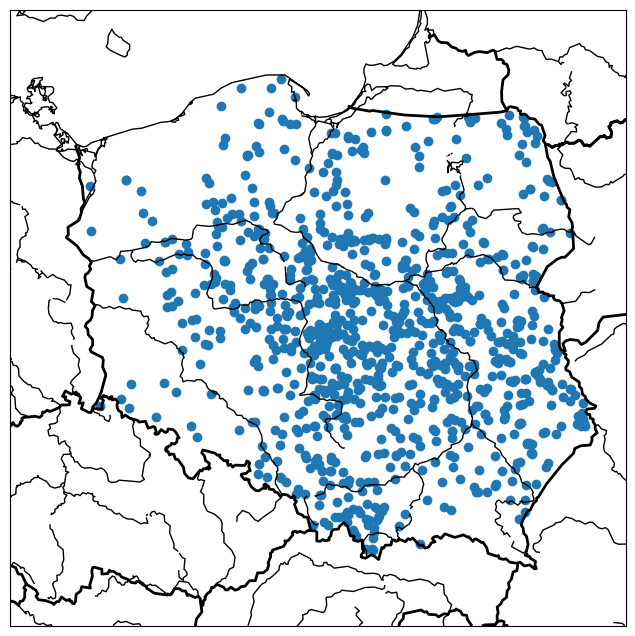

In [196]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection="lcc", resolution='i', 
            width=8e5, height=8e5, 
            lat_0=52, lon_0=19,
            )

m.drawcoastlines(linewidth = 1)
m.drawcountries(linewidth = 2)
m.drawrivers(linewidth = 1)

# m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(
    df["dd_lon"].values[:1000].tolist(),
    df["dd_lat"].values[:1000].tolist()
)
# plt.plot(x, y, 'ok', markersize=5)

m.scatter(x, y)


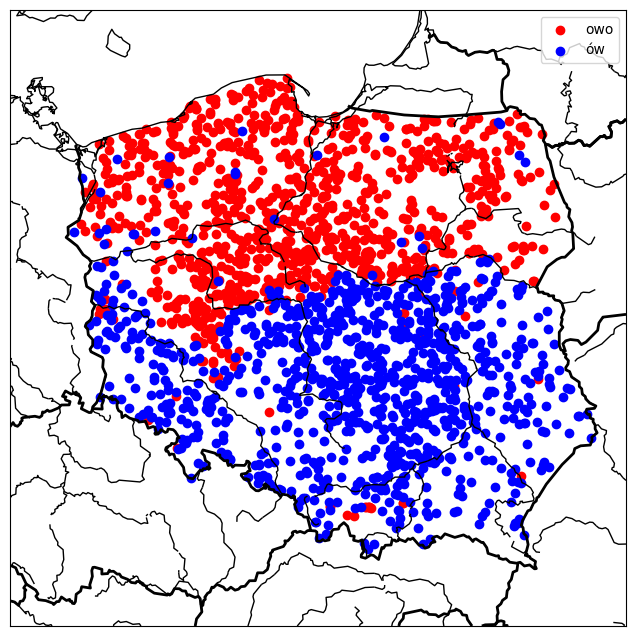

In [200]:
def plot_matplotlib(df, x, y):
    fig = plt.figure(figsize=(8, 8))
    m = Basemap(projection="lcc", resolution='i', 
                width=8e5, height=8e5, 
                lat_0=52, lon_0=19,
                )

    m.drawcoastlines(linewidth = 1)
    m.drawcountries(linewidth = 2)
    m.drawrivers(linewidth = 1)

    # m.etopo(scale=0.5, alpha=0.5)

    # Map (long, lat) to (x, y) for plotting
    x, y = m(
        df[df["name"].str[-3:] == "owo"]["dd_lon"].values[:1000].tolist(),
        df[df["name"].str[-3:] == "owo"]["dd_lat"].values[:1000].tolist()
    )
    # plt.plot(x, y, 'ok', markersize=5)

    m.scatter(x, y, color="red", label="owo")

    x, y = m(
        df[df["name"].str[-2:] == "ów"]["dd_lon"].values[:1000].tolist(),
        df[df["name"].str[-2:] == "ów"]["dd_lat"].values[:1000].tolist()
    )
    # plt.plot(x, y, 'ok', markersize=5)

    m.scatter(x, y, color="blue", label="ów")
    plt.legend()

plot_matplotlib(df, 0, 0)

Resources:
- https://matplotlib.org/basemap/api/basemap_api.html#module-mpl_toolkits.basemap
- https://www.latlong.net/degrees-minutes-seconds-to-decimal-degrees
- https://basemaptutorial.readthedocs.io/en/latest/index.html
- https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

# 2. Folium

In [201]:
import folium

In [205]:

mapit = folium.Map( location=[52.667989, 19.464582], zoom_start=6 )

x, y = df["dd_lon"].values[:1000].tolist(), df["dd_lat"].values[:1000].tolist()

for i in range(100):
    folium.Marker( location=[ y[i], x[i] ], fill_color='#43d9de', radius=8 ).add_to( mapit )

mapit

In [220]:

mapit = folium.Map( location=[52.667989, 19.464582], zoom_start=6 )

x, y = df[df["name"].str[-3:] == "owo"]["dd_lon"].values[:1000].tolist(), df[df["name"].str[-3:] == "owo"]["dd_lat"].values[:1000].tolist()

for i in range(1000):
    folium.Marker( location=[ y[i], x[i] ], icon=folium.Icon(color='red',icon_color='#FFFF00')).add_to( mapit )

x, y = df[df["name"].str[-2:] == "ów"]["dd_lon"].values[:1000].tolist(), df[df["name"].str[-2:] == "ów"]["dd_lat"].values[:1000].tolist()
    # plt.plot(x, y, 'ok', markersize=5)

for i in range(1000):
    folium.Icon( location=[ y[i], x[i] ], radius=8, icon=folium.Icon(icon="circle", color='black',icon_color='#FFFF00')).add_to( mapit )

mapit

TypeError: Object of type Icon is not JSON serializable

# 3. Plotly + Mapbox